<a href="https://colab.research.google.com/github/Evgenius87/Data_Science_hw/blob/main/Hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

conspect exemple:

 За даними акселерометра з мобільного телефону потрібно класифікувати, якою діяльністю займається людина: йде, стоїть, біжить чи йде по сходах

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score



Підготовка ланих з мобільного телефону у датасет

In [1]:
from google.colab import drive
drive.mount('/content/drive')
data = "/content/drive/MyDrive/навчання/Data Science/data/"


Mounted at /content/drive


In [3]:
full_data = pd.DataFrame()
for activity_name in os.listdir(data):
  activity_path = os.path.join(data, activity_name)
  if not os.path.isdir(activity_path):
    continue

  for file_name in os.listdir(activity_path):
        csv_file_path = os.path.join(activity_path, file_name)
        if not file_name.endswith('.csv'):
            continue

        df = pd.read_csv(csv_file_path)
        df['activity'] = activity_name
        full_data = pd.concat([full_data, df], ignore_index=False)
full_data.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,0.277727,-0.004788,9.787497,idle
1,0.234632,-0.038307,9.777920,idle
2,0.253785,-0.023942,9.734824,idle
3,0.205901,0.004788,9.782708,idle
4,0.272939,-0.009577,9.744401,idle


Оскільки парсинг даних займає тривалий час запишимо отриманий датасет у csv файл, з яким будемо працювати

In [6]:
full_data.to_csv("/content/drive/MyDrive/навчання/Data Science/axelerometer_data.csv", index=False)

In [7]:
df = pd.read_csv('/content/drive/MyDrive/навчання/Data Science/axelerometer_data.csv')
df

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,0.277727,-0.004788,9.787497,idle
1,0.234632,-0.038307,9.777920,idle
2,0.253785,-0.023942,9.734824,idle
3,0.205901,0.004788,9.782708,idle
4,0.272939,-0.009577,9.744401,idle
...,...,...,...,...
193855,0.258574,-14.413095,-1.383848,walking
193856,0.359130,-9.337387,-1.829170,walking
193857,1.422156,-9.983821,-0.742202,walking
193858,-8.868123,-16.448166,8.331822,walking


from matplotlib import pyplot as plt
df['accelerometer_X'].plot(kind='hist', bins=20, title='accelerometer_X')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['accelerometer_Y'].plot(kind='hist', bins=20, title='accelerometer_Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['accelerometer_Z'].plot(kind='hist', bins=20, title='accelerometer_Z')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('activity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='accelerometer_X', y='accelerometer_Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='accelerometer_Y', y='accelerometer_Z', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['accelerometer_X'].plot(kind='line', figsize=(8, 4), title='accelerometer_X')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['accelerometer_Y'].plot(kind='line', figsize=(8, 4), title='accelerometer_Y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['accelerometer_Z'].plot(kind='line', figsize=(8, 4), title='accelerometer_Z')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['activity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='accelerometer_X', y='activity', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['activity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='accelerometer_Y', y='activity', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['activity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='accelerometer_Z', y='activity', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Візуалізація даних акселирометра

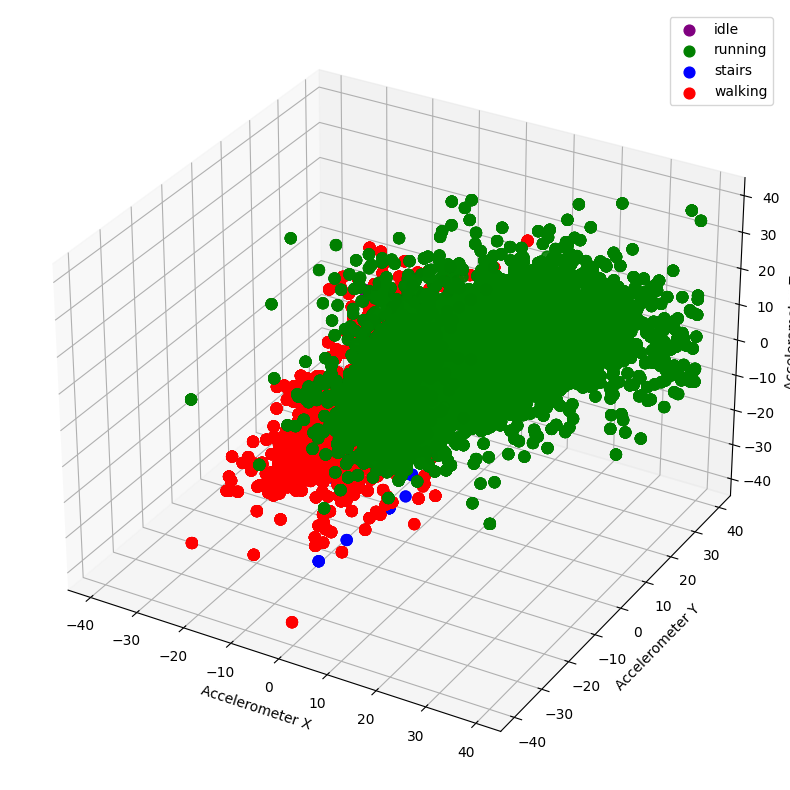

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
colors = {'idle': 'purple', 'stairs': 'blue', 'running': 'green', 'walking': 'red'}

for activity, group in df.groupby('activity'):
    ax.scatter(group['accelerometer_X'], group['accelerometer_Y'], group['accelerometer_Z'], label=activity, color=colors[activity], s=60)

ax.set_xlabel('Accelerometer X')
ax.set_ylabel('Accelerometer Y')
ax.set_zlabel('Accelerometer Z')

ax.legend()
plt.show()

Нормалізація даних для навчання SVC

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_to_norm = df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']]
normalized_data = scaler.fit_transform(data_to_norm)
norm_df = df.copy()
norm_df[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']] = normalized_data
norm_df

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,-0.195818,-0.128518,1.109994,idle
1,-0.200946,-0.131205,1.108662,idle
2,-0.198667,-0.130053,1.102670,idle
3,-0.204364,-0.127750,1.109328,idle
4,-0.196388,-0.128902,1.104001,idle
...,...,...,...,...
193855,-0.198097,-1.283584,-0.443400,walking
193856,-0.186133,-0.876681,-0.505323,walking
193857,-0.059655,-0.928504,-0.354178,walking
193858,-1.283982,-1.446729,0.907580,walking


In [10]:
X = norm_df.drop(['activity'], axis=1)
y = norm_df['activity']


Розділяємо дані на тренувальні і тестові

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,  stratify=y)



Навчання моделей SVC та RandomForest

In [12]:
import time
from sklearn.svm import SVC
start_time = time.time()
clf_svc = SVC().fit(X_train, y_train)
end_time = time.time()
print(f'час навчання: {end_time - start_time}')

час навчання: 229.61389183998108


In [13]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
clf_rt = RandomForestClassifier().fit(X_train, y_train)
end_time = time.time()
print(f'час навчання: {end_time - start_time}')

час навчання: 13.407469511032104


Порівнюємо точність результатів

In [14]:
score_svc = clf_svc.score(X_test, y_test)
score_rf = clf_rt.score(X_test, y_test)
print(f'Точність моделі SVM: {score_svc}\nТочність моделі RandomForest{score_rf}')


Точність моделі SVM: 0.8918310563666489
Точність моделі RandomForest0.9994841654422109


In [15]:
y_predicted_svc = clf_svc.predict(X_test)
y_predicted_rf = clf_rt.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, accuracy_score
svm_report = classification_report(y_test, y_predicted_svc)
print("SVC Results:")
print(svm_report)

rf_report = classification_report(y_test, y_predicted_rf)
print("Random Forest Results:")
print(rf_report)

SVC Results:
              precision    recall  f1-score   support

        idle       0.96      0.98      0.97     10286
     running       0.93      0.90      0.92     33739
      stairs       1.00      0.00      0.00      1634
     walking       0.80      0.90      0.85     18315

    accuracy                           0.89     63974
   macro avg       0.92      0.70      0.68     63974
weighted avg       0.90      0.89      0.88     63974

Random Forest Results:
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00     10286
     running       1.00      1.00      1.00     33739
      stairs       1.00      0.98      0.99      1634
     walking       1.00      1.00      1.00     18315

    accuracy                           1.00     63974
   macro avg       1.00      1.00      1.00     63974
weighted avg       1.00      1.00      1.00     63974



Висновок:
Модель Random Forest перевершила модель SVC з точки зору показників оцінки. Модель SVC на відміну від Random Forest погано ідентифікувала екземпляри класу «stairs», демонструючи recall 0% для цього класу.
Також модель Random Forest набагато швидше навчається ніж метод опорних векторів.
Таким чином, модель Random Forest є більш ефективним класифікатором даних акселерометра.